In [1]:
%load_ext autoreload
%autoreload 2

from preprocess import *
import keras
import librosa.display
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

# Second dimension of the feature is dim2
feature_dim_2 = 15

# Save data to array file first
save_data_to_array(max_len=feature_dim_2)

# # Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

# # Feature dimension
feature_dim_1 = 21
channel = 1
epochs = 100
batch_size = 100
verbose = 1
num_classes = 15

# Reshaping to perform 2D convolution
X_train = X_train.reshape(X_train.shape[0], feature_dim_1, feature_dim_2, channel)
X_test = X_test.reshape(X_test.shape[0], feature_dim_1, feature_dim_2, channel)

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

Using TensorFlow backend.
Saving vectors of label - '99WNoise': 100%|████████████████████████████████████████| 2759/2759 [00:28<00:00, 97.67it/s]


In [5]:
def get_model():
    model = Sequential()
    model.add(Conv2D(16, (2, 2), activation='relu', input_shape=(feature_dim_1, feature_dim_2, channel)))
    model.add(Conv2D(16, kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))
    model.add(Conv2D(44, (2, 2), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(20, activation='relu'))
    #model.add(Dense(3, activation='softmax'))
    
    #model = Sequential()
    #model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(feature_dim_1, feature_dim_2, channel)))
    #model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    #model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))
    #model.add(Flatten())
    #model.add(Dense(128, activation='relu'))
    #model.add(Dropout(0.25))
    #model.add(Dense(64, activation='relu'))
    #model.add(Dropout(0.4))
    #model.add(Dense(num_classes, activation='softmax'))
    
    #model = Sequential()
    #model.add(Conv2D(16, kernel_size=(2, 2), activation='relu', input_shape=(feature_dim_1, feature_dim_2, channel)))
    #model.add(Conv2D(16, kernel_size=(2, 2), activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))
    #model.add(Flatten())
    #model.add(Dense(12, activation='relu'))
    #model.add(Dropout(0.25))
    #model.add(Dense(4, activation='relu'))
    #model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model

# Predicts one sample
def predict(filepath, model):
    sample = wav2mfcc(filepath, max_len=feature_dim_2)
    sample_reshaped = sample.reshape(1, feature_dim_1, feature_dim_2, channel)
    return get_labels()[0][
            np.argmax(model.predict(sample_reshaped))
    ]

# Building The Model Then Training it

In [6]:
epochs = 50
model = get_model()
model.fit(X_train, y_train_hot, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_data=(X_test, y_test_hot))

Train on 3585 samples, validate on 2390 samples
Epoch 1/50
3585/3585 [==============================] - ETA: 4s - loss: 7.9030 - accuracy: 0.04 - ETA: 1s - loss: 4.6227 - accuracy: 0.14 - ETA: 0s - loss: 3.8140 - accuracy: 0.21 - ETA: 0s - loss: 3.4157 - accuracy: 0.25 - ETA: 0s - loss: 3.1737 - accuracy: 0.28 - ETA: 0s - loss: 3.0091 - accuracy: 0.31 - ETA: 0s - loss: 2.8480 - accuracy: 0.33 - ETA: 0s - loss: 2.7377 - accuracy: 0.34 - ETA: 0s - loss: 2.6446 - accuracy: 0.36 - 1s 222us/step - loss: 2.5878 - accuracy: 0.3662 - val_loss: 1.8610 - val_accuracy: 0.4410
Epoch 2/50
3585/3585 [==============================] - ETA: 0s - loss: 1.8725 - accuracy: 0.45 - ETA: 0s - loss: 1.8721 - accuracy: 0.46 - ETA: 0s - loss: 1.7850 - accuracy: 0.48 - ETA: 0s - loss: 1.7705 - accuracy: 0.47 - ETA: 0s - loss: 1.7433 - accuracy: 0.48 - ETA: 0s - loss: 1.7345 - accuracy: 0.47 - ETA: 0s - loss: 1.7035 - accuracy: 0.48 - ETA: 0s - loss: 1.6970 - accuracy: 0.48 - ETA: 0s - loss: 1.6853 - accuracy: 0

3585/3585 [==============================] - ETA: 0s - loss: 0.1430 - accuracy: 0.96 - ETA: 0s - loss: 0.1297 - accuracy: 0.97 - ETA: 0s - loss: 0.1565 - accuracy: 0.96 - ETA: 0s - loss: 0.1660 - accuracy: 0.95 - ETA: 0s - loss: 0.1586 - accuracy: 0.95 - ETA: 0s - loss: 0.1579 - accuracy: 0.95 - ETA: 0s - loss: 0.1582 - accuracy: 0.95 - ETA: 0s - loss: 0.1497 - accuracy: 0.95 - ETA: 0s - loss: 0.1488 - accuracy: 0.95 - 1s 182us/step - loss: 0.1449 - accuracy: 0.9556 - val_loss: 0.0880 - val_accuracy: 0.9778
Epoch 17/50
3585/3585 [==============================] - ETA: 0s - loss: 0.0898 - accuracy: 0.97 - ETA: 0s - loss: 0.0940 - accuracy: 0.97 - ETA: 0s - loss: 0.0890 - accuracy: 0.97 - ETA: 0s - loss: 0.1070 - accuracy: 0.96 - ETA: 0s - loss: 0.1220 - accuracy: 0.96 - ETA: 0s - loss: 0.1135 - accuracy: 0.96 - ETA: 0s - loss: 0.1139 - accuracy: 0.96 - ETA: 0s - loss: 0.1244 - accuracy: 0.96 - ETA: 0s - loss: 0.1303 - accuracy: 0.96 - 1s 179us/step - loss: 0.1298 - accuracy: 0.9609 - va

3585/3585 [==============================] - ETA: 0s - loss: 0.0279 - accuracy: 1.00 - ETA: 0s - loss: 0.0315 - accuracy: 0.99 - ETA: 0s - loss: 0.0401 - accuracy: 0.99 - ETA: 0s - loss: 0.0371 - accuracy: 0.99 - ETA: 0s - loss: 0.0349 - accuracy: 0.99 - ETA: 0s - loss: 0.0438 - accuracy: 0.98 - ETA: 0s - loss: 0.0474 - accuracy: 0.98 - ETA: 0s - loss: 0.0510 - accuracy: 0.98 - ETA: 0s - loss: 0.0476 - accuracy: 0.98 - 1s 181us/step - loss: 0.0492 - accuracy: 0.9852 - val_loss: 0.0395 - val_accuracy: 0.9904
Epoch 32/50
3585/3585 [==============================] - ETA: 0s - loss: 0.1225 - accuracy: 0.97 - ETA: 0s - loss: 0.0461 - accuracy: 0.98 - ETA: 0s - loss: 0.0348 - accuracy: 0.98 - ETA: 0s - loss: 0.0388 - accuracy: 0.98 - ETA: 0s - loss: 0.0466 - accuracy: 0.98 - ETA: 0s - loss: 0.0441 - accuracy: 0.98 - ETA: 0s - loss: 0.0510 - accuracy: 0.98 - ETA: 0s - loss: 0.0478 - accuracy: 0.98 - ETA: 0s - loss: 0.0512 - accuracy: 0.98 - 1s 173us/step - loss: 0.0502 - accuracy: 0.9833 - va

3585/3585 [==============================] - ETA: 0s - loss: 0.0556 - accuracy: 0.99 - ETA: 0s - loss: 0.0307 - accuracy: 0.99 - ETA: 0s - loss: 0.0288 - accuracy: 0.99 - ETA: 0s - loss: 0.0264 - accuracy: 0.99 - ETA: 0s - loss: 0.0236 - accuracy: 0.99 - ETA: 0s - loss: 0.0312 - accuracy: 0.99 - ETA: 0s - loss: 0.0343 - accuracy: 0.99 - ETA: 0s - loss: 0.0345 - accuracy: 0.99 - ETA: 0s - loss: 0.0324 - accuracy: 0.99 - 1s 186us/step - loss: 0.0306 - accuracy: 0.9914 - val_loss: 0.0240 - val_accuracy: 0.9925
Epoch 47/50
3585/3585 [==============================] - ETA: 0s - loss: 0.0908 - accuracy: 0.98 - ETA: 0s - loss: 0.0495 - accuracy: 0.98 - ETA: 0s - loss: 0.0446 - accuracy: 0.98 - ETA: 0s - loss: 0.0376 - accuracy: 0.98 - ETA: 0s - loss: 0.0317 - accuracy: 0.99 - ETA: 0s - loss: 0.0295 - accuracy: 0.99 - ETA: 0s - loss: 0.0299 - accuracy: 0.99 - ETA: 0s - loss: 0.0311 - accuracy: 0.99 - ETA: 0s - loss: 0.0333 - accuracy: 0.98 - 1s 177us/step - loss: 0.0333 - accuracy: 0.9891 - va

In [7]:
model.save('model.h5')

## Prediction

In [6]:
print(predict('./data/06Vremya/a00010.wav', model=model))

06Vremya


In [7]:
print(predict('./data/04Temperatyry/a00025.wav', model=model))

04Temperatyry


In [5]:
from preprocess import *
mfcc2 = wav2mfcc('./data/01Vkluchi/a00000.wav', max_len=29)
print(mfcc2, mfcc2.shape[0], mfcc2.shape[1])

[[-29.798954  -29.397179  -15.118538  -13.29954   -12.375621  -11.580762
  -15.048429  -25.84866   -29.789274  -29.303007  -29.295109  -31.117985
  -16.979221  -13.255153  -14.192554  -15.1905    -18.438934  -26.960354
  -30.78664   -32.683136  -33.338615  -33.795113  -32.501957  -31.61874
  -29.712877  -31.082563  -32.46074   -30.98296   -30.905878 ]
 [-35.23786   -34.102036   -9.701887   -5.0001087  -4.069337   -5.295003
  -10.14346   -24.82382   -30.299189  -29.788897  -30.41117   -31.518345
  -13.977265   -8.345358   -6.7971153  -7.4024687 -12.209178  -22.492424
  -24.12958   -27.413485  -33.11305   -38.055897  -36.924706  -34.54484
  -34.666588  -37.032204  -36.152283  -35.38239   -34.848354 ]
 [-38.147396  -36.768616   -8.509742   -1.7549443   0.         -1.708157
   -6.253356  -19.302649  -19.175985  -23.568619  -26.515486  -31.110687
  -11.383619   -3.3674164  -1.5429296  -3.8127186  -8.717581  -19.053675
  -25.50524   -32.24279   -33.527878  -35.29161   -40.412834  -38.212517


In [ ]:
wave, sr = librosa.load('./data/Vkluchi/a00000.wav', mono=True, sr=None)


In [68]:
wave, sr = librosa.load('./data/Vkluchi/a00000.wav', mono=True, sr=None)
fftr = wavffc('./data/Vkluchi/a00000.wav')
print(fftr)
fftr[0] = 0
S_mel = librosa.feature.melspectrogram(S=fftr, sr=16000, n_mels=30, n_fft=1024, hop_length=1024, center=False, htk=False)
#S_mel = S_mel / S_mel.max()
#S_log_mel = librosa.power_to_db(S_mel, top_db=80.0)
print(S_mel)
S_mel = librosa.util.normalize(S_mel, axis=0)
print(S_mel.shape, S_mel)

[4.63303566e-01 2.73601699e+00 2.22772503e+01 2.13421607e+00
 2.34374380e+00 2.71260071e+00 5.07722950e+00 6.13943934e-01
 2.00677681e+00 1.68209866e-01 4.02539164e-01 2.02003837e-01
 5.64708292e-01 2.88311076e+00 4.82397437e-01 7.24429727e-01
 7.56988347e-01 6.70323312e-01 3.33564542e-02 9.79743540e-01
 1.39880002e-01 1.14331916e-01 4.03713994e-03 2.82572269e-01
 2.42539614e-01 1.81117907e-01 2.78106332e-01 1.06679328e-01
 8.79474357e-02 3.06289881e-01 2.63973504e-01 2.77377307e-01
 1.75735563e-01 4.07222733e-02 2.31551677e-01 1.61131069e-01
 2.68413126e-01 2.03822479e-01 1.32335380e-01 1.85862444e-02
 1.29362747e-01 2.51259636e-02 1.08813480e-01 2.33205587e-01
 1.58804998e-01 1.67415455e-01 1.89801212e-04 5.99003062e-02
 1.56132340e-01 5.73958782e-03 2.55662143e-01 8.71245787e-02
 9.92970690e-02 4.93641896e-03 5.73265366e-02 2.94338018e-01
 1.92531385e-02 2.58325152e-02 3.94247435e-02 2.62372755e-02
 1.04249818e-02 2.42287144e-02 5.53319510e-03 1.69632480e-01
 1.78701077e-02 9.284068

 0.00596902 0.00270305 0.00399121 0.01439406 0.00519313 0.00121941]


In [8]:
filters = librosa.filters.mel(16000, n_fft=1024, n_mels=30, htk=True)
filters = librosa.util.normalize(filters, axis=1)
print(filters.shape, filters[21])

(30, 513) [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0

In [14]:
wave, sr = librosa.load('./data/Skazhi/a00000.wav', mono=True, sr=None)
fft_out = fft.fft(wave, n=1024, axis=0)[:513]
S_pwr = np.abs(fft_out)**2
mel_basis = librosa.filters.mel(16000, n_fft=1024, n_mels=30, htk=False)
mel_basis.shape == (30, 513)
S_mel = np.dot(mel_basis, S_pwr)
S_mel.astype(np.float32)
S_mel = S_mel / S_mel.max()
S_mel = librosa.power_to_db(S_mel, top_db=80.0)
print(S_mel.shape, S_mel)

(30,) [  0.         -6.9686933 -11.585931  -14.434444  -15.672449  -16.58454
 -16.722662  -16.943474  -15.688942  -17.742516  -21.149843  -15.882637
 -16.493765  -16.717918  -17.604362  -19.145472  -21.286072  -21.276878
 -21.966257  -21.642523  -22.365349  -22.353037  -21.09227   -20.46326
 -19.702482  -18.486212  -13.002004  -15.028452  -18.691029  -21.072569 ]


[[9.83721344e-04 2.84375343e-02 5.74674979e-02 1.15299132e-02
  1.10939902e-03 5.49323915e-04 8.41904432e-03 3.54965888e-02
  1.07414564e-02 8.02236493e-04 3.42357729e-04 4.65819321e-04
  5.16486936e-04 6.60426973e-04 1.15444185e-03]
 [2.68985634e-04 5.19221500e-02 4.20038015e-01 2.47977674e-02
  1.31308928e-03 8.67379014e-04 7.48846401e-03 1.78445101e-01
  3.36531512e-02 3.73884593e-03 3.26872105e-04 1.27036998e-04
  2.21458045e-04 2.00320981e-04 2.81383545e-04]
 [1.08464323e-04 8.79914835e-02 1.00000000e+00 9.66491774e-02
  1.05467662e-02 1.91693089e-03 6.83479104e-03 6.69615388e-01
  8.63415673e-02 1.50233437e-03 3.24074936e-04 6.36866898e-05
  1.09996006e-04 9.44771309e-05 7.19136733e-05]
 [5.01571049e-05 6.39995234e-03 2.99473196e-01 2.37745810e-02
  4.07273555e-03 6.52340997e-04 1.60245667e-03 1.60525143e-01
  1.27933826e-02 3.93963797e-04 1.87962825e-04 3.58892139e-05
  5.42203379e-05 4.04549428e-05 1.64472349e-05]
 [5.24648785e-05 1.62364240e-03 4.74233786e-03 3.83645616e-04
  

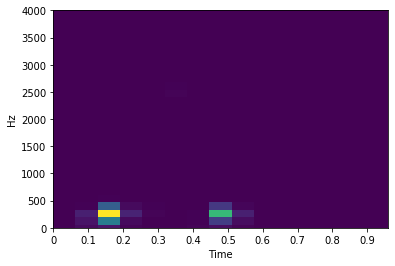

In [58]:
from preprocess import *
feature = wav2mfcc('./data/Vkluchi/a00000.wav', max_len=15).astype('float32')
print(feature, feature.shape[0], feature.shape[1])
librosa.display.specshow(feature, sr=8000, y_axis='linear', fmax=8000, x_axis='time', cmap='viridis')

In [18]:
predictions = model.predict(X_test)
print('размерность прогнозов:', predictions)

размерность прогнозов: [[7.41772237e-04 9.98251855e-01 1.00633933e-03]
 [1.52985478e-04 9.99777019e-01 7.00198216e-05]
 [4.21735598e-03 8.33643693e-03 9.87446189e-01]
 [9.64331388e-01 6.32845936e-03 2.93401349e-02]
 [9.99958158e-01 3.99518285e-05 1.94137010e-06]
 [1.90263195e-03 1.16546769e-04 9.97980893e-01]
 [2.51400610e-03 1.20091267e-04 9.97365892e-01]
 [5.71762037e-04 9.93033648e-01 6.39453717e-03]
 [9.98464346e-01 8.92294163e-04 6.43319043e-04]
 [9.99849319e-01 1.39959317e-04 1.07818651e-05]
 [4.31357039e-05 9.99915481e-01 4.13214730e-05]
 [2.00985884e-03 1.39994983e-04 9.97850180e-01]
 [9.71097597e-06 9.99986410e-01 3.94526887e-06]
 [9.94812250e-01 4.37742611e-03 8.10284342e-04]
 [2.13809568e-03 2.80945242e-04 9.97580886e-01]
 [3.38968312e-05 9.99952912e-01 1.32015603e-05]
 [9.95981693e-01 3.65534401e-03 3.62956896e-04]
 [8.83848843e-05 9.99533057e-01 3.78588564e-04]
 [6.07084204e-03 4.52556834e-03 9.89403605e-01]
 [9.99678850e-01 3.19940504e-04 1.18450043e-06]
 [9.99440134e-01 

In [12]:
print(np.asarray(model.predict(X_test)).reshape(-1))

[9.0568429e-01 9.4315782e-02 9.7798866e-01 2.2011356e-02 2.2149237e-01
 7.7850759e-01 9.6203065e-01 3.7969310e-02 1.2589118e-01 8.7410879e-01
 9.9641490e-01 3.5851269e-03 9.9015862e-01 9.8413592e-03 9.9621624e-01
 3.7837585e-03 2.5947165e-01 7.4052840e-01 2.3444666e-01 7.6555336e-01
 9.8481536e-01 1.5184598e-02 2.8079289e-01 7.1920711e-01 9.7958571e-01
 2.0414220e-02 1.8542054e-01 8.1457949e-01 9.8240227e-01 1.7597742e-02
 9.9524456e-01 4.7554346e-03 9.9725157e-01 2.7484572e-03 1.4740415e-01
 8.5259587e-01 4.4933605e-01 5.5066395e-01 9.9824959e-01 1.7503382e-03
 2.9330128e-01 7.0669866e-01 2.0526153e-01 7.9473853e-01 1.3503942e-01
 8.6496067e-01 9.7786295e-01 2.2137081e-02 9.6144474e-01 3.8555238e-02
 2.4037284e-01 7.5962710e-01 6.1830544e-01 3.8169453e-01 9.8949170e-01
 1.0508246e-02 3.9584649e-01 6.0415345e-01 5.2282137e-01 4.7717860e-01
 4.3100101e-01 5.6899893e-01 9.9103934e-01 8.9606270e-03 9.6898097e-01
 3.1019049e-02 9.9127370e-01 8.7262783e-03 9.7927630e-01 2.0723762e-02
 9.728